<a href="https://colab.research.google.com/github/icarorodolfo27/EPL_analise/blob/main/An%C3%A1lise_Premier_League_Definitiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando as bibliotecas que serão utilizadas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
from google.colab import files
import os
%matplotlib inline

In [2]:
upload = files.upload()

Saving EPL_20_21.csv to EPL_20_21.csv


In [3]:
EPL_stats = pd.read_csv(io.BytesIO(upload['EPL_20_21.csv']))

# Visualizando as primeiras linhas do dataset

In [4]:
EPL_stats.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


# Agrupando pelas equipes que mais marcaram gols

In [5]:
sum_goals = EPL_stats.groupby('Club').Goals.sum().sort_values(ascending=False)
sum_goals

Club
Manchester City            82
Manchester United          70
Tottenham Hotspur          66
Liverpool FC               65
Leicester City             64
Leeds United               60
West Ham United            60
Chelsea                    56
Arsenal                    53
Aston Villa                52
Southampton                47
Everton                    45
Newcastle United           44
Crystal Palace             39
Brighton                   39
Wolverhampton Wanderers    34
West Bromwich Albion       33
Burnley                    32
Fulham                     26
Sheffield United           19
Name: Goals, dtype: int64

# Agrupando pelas equipes que tiveram a maior expectativa de gols

In [6]:
sum_xG = EPL_stats.groupby('Club').xG.sum()
sum_xG.sort_values(ascending=False)

Club
Manchester City            3.88
Liverpool FC               3.87
Chelsea                    3.70
Sheffield United           3.67
Arsenal                    3.66
Brighton                   3.39
Leicester City             3.35
Aston Villa                3.28
Manchester United          3.16
Tottenham Hotspur          3.10
Wolverhampton Wanderers    3.10
Fulham                     2.99
West Ham United            2.75
Leeds United               2.68
Newcastle United           2.65
Everton                    2.47
West Bromwich Albion       2.41
Southampton                2.37
Burnley                    2.17
Crystal Palace             1.62
Name: xG, dtype: float64

# Multiplicando a expectativa de gols pela quantidade de partidas

In [7]:
#Fatiando pelas colunas que eu quero trabalhar
total_expected = EPL_stats.loc[:, ['Club', 'Goals', 'xG', 'Matches']]

In [8]:
total_expected['Total_xG'] = EPL_stats['xG'] * EPL_stats['Matches'] 
#Como a expectativa de gols está em média por partida, devemos multiplicá-la pela quandidade de jogos para obter a quantidade total 

# Agrupando e somando os gols e a expectativa de gols por equipe

In [9]:
team_xG = total_expected.groupby('Club').agg({'Total_xG': 'sum', 'Goals': 'sum'})
team_xG.head()

,Total_xG,Goals
Club,,
Arsenal,80.95,53
Aston Villa,71.69,52
Brighton,74.19,39
Burnley,53.53,32
Chelsea,91.11,56


In [10]:
#Ordenando pelas equipes que mais marcaram gols

team_xG.sort_values(by='Goals', ascending=False)

,Total_xG,Goals
Club,,
Manchester City,94.09,82
Manchester United,79.41,70
Tottenham Hotspur,73.91,66
Liverpool FC,92.99,65
Leicester City,71.23,64
Leeds United,76.49,60
West Ham United,69.01,60
Chelsea,91.11,56
Arsenal,80.95,53


# Plotando um gráfico de dispersão para verificar a tendência entre gols e expectativa de gols


Text(0, 0.5, 'Total_xG')

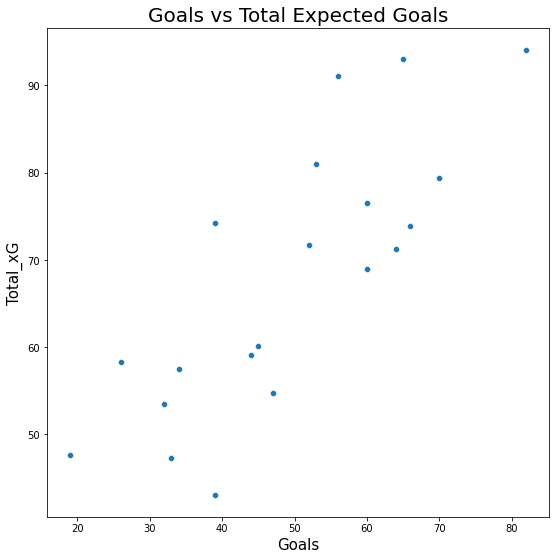

In [11]:
fig, ax = plt.subplots(figsize=(9, 9))
s = sns.scatterplot(x='Goals', y='Total_xG', data=team_xG) 
s.set_title('Goals vs Total Expected Goals', fontsize=20)
s.set_xlabel('Goals', fontsize=15)
s.set_ylabel('Total_xG', fontsize=15)

# É possível verificar uma certa tendência entre as duas variáveis, logo vamos verificar o valor desta correlação:

In [12]:
correlation = team_xG.corr()
correlation.style.background_gradient(cmap='Blues')

,Total_xG,Goals
Total_xG,1.000000,0.804456
Goals,0.804456,1.000000


# Analisando os jogadores que mais contribuíram diretamente com gols pelas suas equipes, somando gols e assistências

In [13]:
best_players = EPL_stats.loc[:, ['Club', 'Name', 'Goals', 'Assists']] #Primeiro, fatiamos o dataframe selecionando as colunas que serão utilizadas

In [14]:
best_players['Contribuitions'] = EPL_stats['Goals'] + EPL_stats['Assists'] #Criando uma nova coluna que soma as participações diretas em gols

f = {'Contribuitions': 'max'}
groups = best_players.groupby(['Club', 'Name'], as_index=False)
m = groups.agg(f).sort_values(by='Contribuitions', ascending=False)
goals_contribuitions = m.loc[m.groupby(['Club'])['Contribuitions'].idxmax()] #Retorna o índice com o maior valor de contribuições de gols por clubes e 
goals_contribuitions = goals_contribuitions.reset_index()                    #pelo nome do jogador
goals_contribuitions = goals_contribuitions.loc[:, ['Club', 'Name', 'Contribuitions']]
goals_contribuitions

,Club,Name,Contribuitions
0,Arsenal,Alexandre Lacazette,15
1,Aston Villa,Ollie Watkins,19
2,Brighton,Pascal Groß,11
3,Burnley,Chris Wood,15
4,Chelsea,Timo Werner,14
5,Crystal Palace,Wilfried Zaha,13
6,Everton,Dominic Calvert-Lewin,16
7,Fulham,Ademola Lookman,8
8,Leeds United,Patrick Bamford,24
9,Leicester City,Jamie Vardy,24


# Gráfico para representar as equipes que possuem o maior construtor de gols

Text(0, 0.5, 'Clubs')

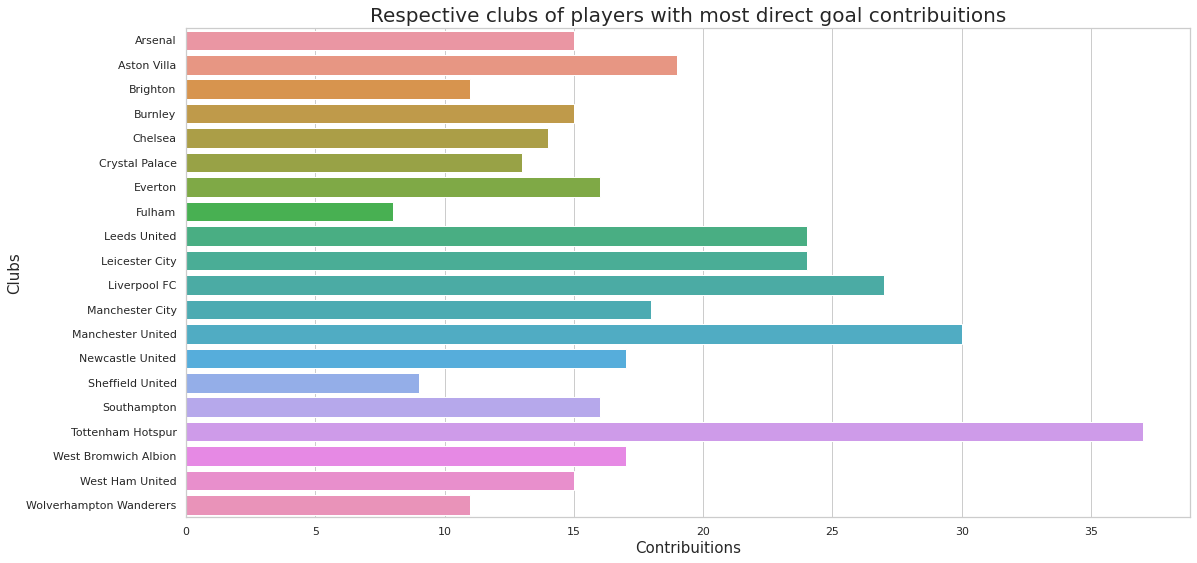

In [26]:
fig, ax = plt.subplots(figsize=(18, 9))
sns.set_theme(style="whitegrid")
b = sns.barplot(x='Contribuitions', y='Club', data=goals_contribuitions)
b.set_title('Respective clubs of players with most direct goal contribuitions', fontsize=20)
b.set_xlabel('Contribuitions', fontsize=15)
b.set_ylabel('Clubs', fontsize=15)


# Gráfico para representar a quantidade de contribuições diretas de gols por jogadores

Text(0, 0.5, 'Name')

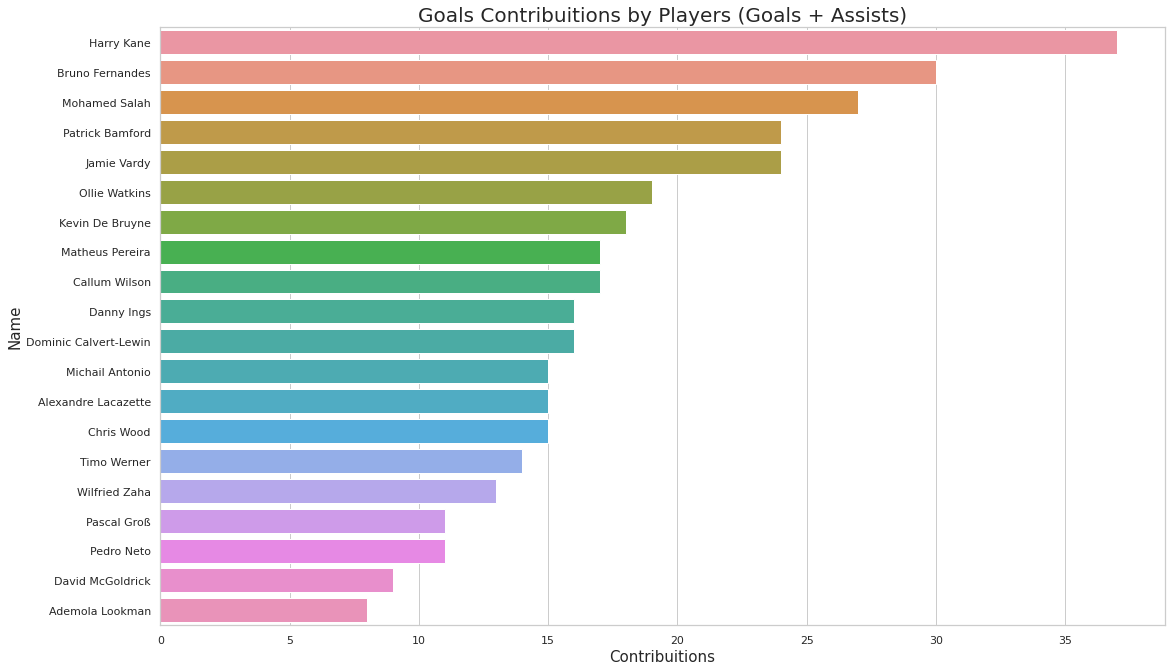

In [16]:
fig, ax = plt.subplots(figsize=(18, 11))
sns.set_theme(style="whitegrid")
ordered_data = goals_contribuitions.sort_values(by='Contribuitions', ascending=False)
c = sns.barplot(x='Contribuitions', y='Name', data=ordered_data)
c.set_title('Goals Contribuitions by Players (Goals + Assists)', fontsize=20)
c.set_xlabel('Contribuitions', fontsize=15)
c.set_ylabel('Name', fontsize=15)

# Equipes mais faltosas da temporada

In [17]:
most_fouled_clubs = EPL_stats.head()
most_fouled_clubs = EPL_stats.loc[:, ['Club', 'Yellow_Cards', 'Red_Cards']]
most_fouled_clubs['Both_Cards'] = most_fouled_clubs['Yellow_Cards'] + most_fouled_clubs['Red_Cards']
group = most_fouled_clubs.groupby('Club').sum().reset_index()
group

,Club,Yellow_Cards,Red_Cards,Both_Cards
0,Arsenal,49,5,54
1,Aston Villa,71,4,75
2,Brighton,49,6,55
3,Burnley,48,0,48
4,Chelsea,51,3,54
5,Crystal Palace,56,2,58
6,Everton,59,2,61
7,Fulham,67,3,70
8,Leeds United,61,1,62
9,Leicester City,61,0,61


Text(0, 0.5, 'Cards')

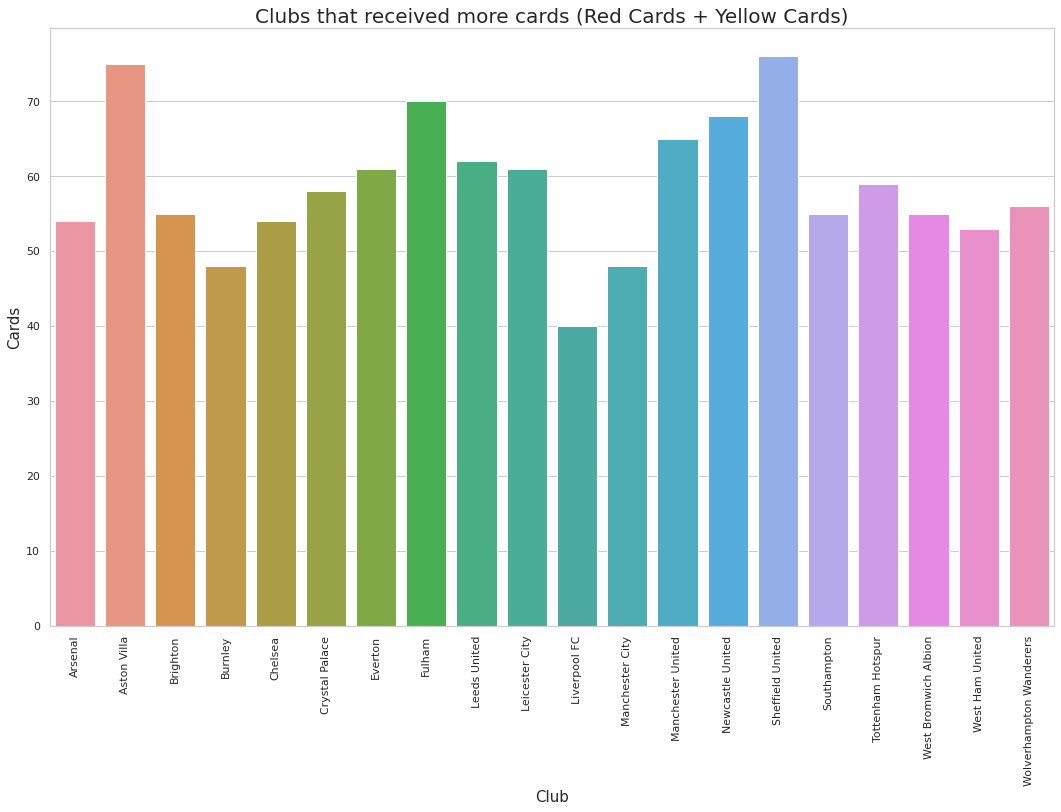

In [18]:
fig, ax = plt.subplots(figsize=(18, 11))
plt.xticks(rotation=90)
d = sns.barplot(x='Club', y='Both_Cards', data=group)
d.set_title('Clubs that received more cards (Red Cards + Yellow Cards)', fontsize=20)
d.set_xlabel('Club', fontsize=15)
d.set_ylabel('Cards', fontsize=15)